# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


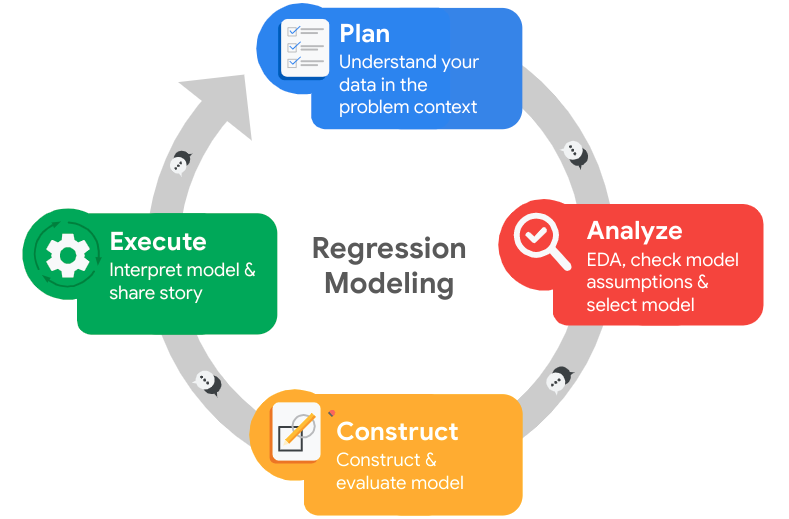

## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

**Observations:**

All PII was removed beforehand, so at this point there aren't any concerns regarding this point. Still, the monthly hours, word accident and promotion variables might being concerning from a ethical viewpoint depending on how they correlate to turnover.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

In [6]:
df0.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
Department,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Observations:**
- There are 15,000 observations and 10 columns (including target)
- There are no null values in the dataset
- Column dtypes are: 2 floats, 6 integers and 2 objects

### Gather descriptive statistics about the data

In [5]:
df0.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- satisfaction_level: the mean value is slightly bellow the median, indicating we might have a few extreme values in the lower end, such as the min
<br>

- time_spend_company: the difference between mean and meadian, combined with the high max value, indicate a few extreme points in the upper end. Also, the min indicates only employees that worket at least 2 years are being considered for this analysis
<br>
- Department: there are 10 categories with sales being the most frequent
<br>
- salary: there are only 3 unique groupings, with almost half employees being low earners
<br>
- Work_accident, left (target) and promotion_last_5years are binary, and they all seems to be skewed towards the 0 value, specially promotion_last_5years, with an astonishing 0.02 mean
<br>
- last_evaluation, number_project and average_monthly_hours don't seem to have extreme values

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
               'average_monthly_hours', 'company_time', 'work_accident', 
               'turnover', 'promotion_last_5years', 'department', 'salary']
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'company_time', 'work_accident', 'turnover',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
company_time             0
work_accident            0
turnover                 0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**Observations:**

Earlier code already showed us there are no null values in the dataset

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
dupes = df0[df0.duplicated()]
dupes.shape[0]

3008

**Observations:**

The number of duplicates seems way too high.
Considering the the original dataset had only 15k observations, duplicates ammount to 20% of our data. 

In [10]:
dupes.head().T

,396,866,1317,1368,1461
satisfaction_level,0.46,0.41,0.37,0.41,0.42
last_evaluation,0.57,0.46,0.51,0.52,0.53
number_project,2,2,2,2,2
average_monthly_hours,139,128,127,132,142
company_time,3,3,3,3,3
work_accident,0,0,0,0,0
turnover,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
department,sales,accounting,sales,RandD,sales
salary,low,low,medium,low,low


**Observations:**

With most columns being categorical, binary or low variation discrete, there would be room for some consideration in regards to the inputs being just identical observations instead of duplicates, after all, employees in the same department having similar experiences does seem quite logical to some extent. However, having the exact same satisfaction level and evaluation too, would be a bit of a stretch. Since we can't get in contact with the party responsible for the data to check, it should be safer to assume they are duplicates and removing them from the dataset.

One last concern is how this affects the distribution of binary variables, specially the target, so let's do a quick comparison between the original df and the one after removal.


In [4]:
df1 = df0.drop_duplicates(ignore_index=True)
df1.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_monthly_hours,157,262,272,223,159
company_time,3,6,4,5,3
work_accident,0,0,0,0,0
turnover,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
department,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


In [12]:
df0[['work_accident','turnover','promotion_last_5years']].mean()

work_accident            0.144610
turnover                 0.238083
promotion_last_5years    0.021268
dtype: float64

In [13]:
df1[['work_accident','turnover','promotion_last_5years']].mean()

work_accident            0.154282
turnover                 0.166041
promotion_last_5years    0.016929
dtype: float64

In [38]:
100*df1['promotion_last_5years'].value_counts()/df1['promotion_last_5years'].count()

0    98.307064
1     1.692936
Name: promotion_last_5years, dtype: float64

**Observations:**

Our target's distribution got a lot more imbalanced, going from a 0/1 split of 76.2%/23.8% to 83.4%/16.6%, but it's still only a moderate imbalance and we have tools to deal with that when modeling, if necessary.

Also, it's important to note only 1.7% of employees received a promotion in the last 5 years.

### Check outliers

Check for outliers in the data.

<Axes: >

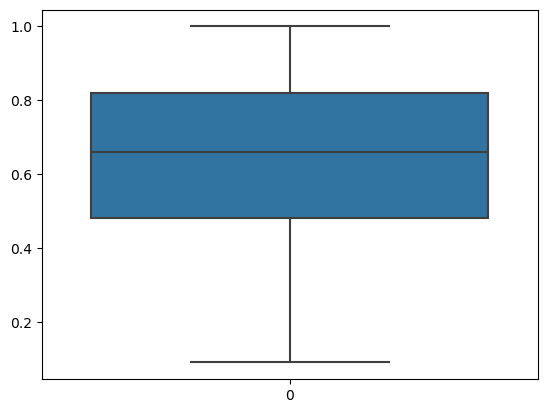

In [14]:
sns.boxplot(df1['satisfaction_level'])

**Observations:**

Even though we have some extreme values in the lower end, there aren't any outliers in the satisfaction level column.

<Axes: >

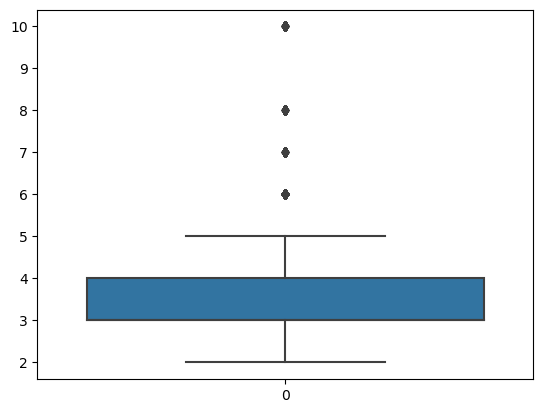

In [15]:
sns.boxplot(df1['company_time'])

In [16]:
percentile75 = df1['company_time'].quantile(0.75)
percentile25 = df1['company_time'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
print(f'Upper limit is {upper_limit} years.')

Upper limit is 5.5 years.


In [17]:
outlier_count = df1.query('company_time > 5.5')['company_time'].count()
total_rows = df1.shape[0]
percent_outliers = outlier_count/total_rows
print(f'Rows contaning outliers: {outlier_count}')
print(f'Total rows: {total_rows}')
print(f'Percentage of rows containing outliers: {percent_outliers:.02%}')

Rows contaning outliers: 824
Total rows: 11991
Percentage of rows containing outliers: 6.87%


In [18]:
outliers = df1.query('company_time > 5.5').copy()
outliers['salary'].value_counts()

medium    407
low       311
high      106
Name: salary, dtype: int64

In [19]:
100*outliers['salary'].value_counts()/outlier_count

medium    49.393204
low       37.742718
high      12.864078
Name: salary, dtype: float64

In [20]:
outliers['department'].value_counts()

sales          242
technical      130
support        100
management      76
IT              61
marketing       56
product_mng     45
RandD           45
accounting      38
hr              31
Name: department, dtype: int64

In [21]:
100*outliers['department'].value_counts()/outlier_count

sales          29.368932
technical      15.776699
support        12.135922
management      9.223301
IT              7.402913
marketing       6.796117
product_mng     5.461165
RandD           5.461165
accounting      4.611650
hr              3.762136
Name: department, dtype: float64

**Observations:**

We have a total of 824 rows containing ouliers, representing 6.87% of our dataframe.
In this context we can assume the outliers are actual observations, that contain important informationg regarting long term employment. Therefore, it seems reasonable to maintain this observations and use either preprocessing before modeling or select a model that is resistant to ouliers, such as Random Forest.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# PACE: Analyze
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [22]:
df1.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_monthly_hours,157,262,272,223,159
company_time,3,6,4,5,3
work_accident,0,0,0,0,0
turnover,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
department,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


Text(0.5, 1.0, 'Variable Correlations')

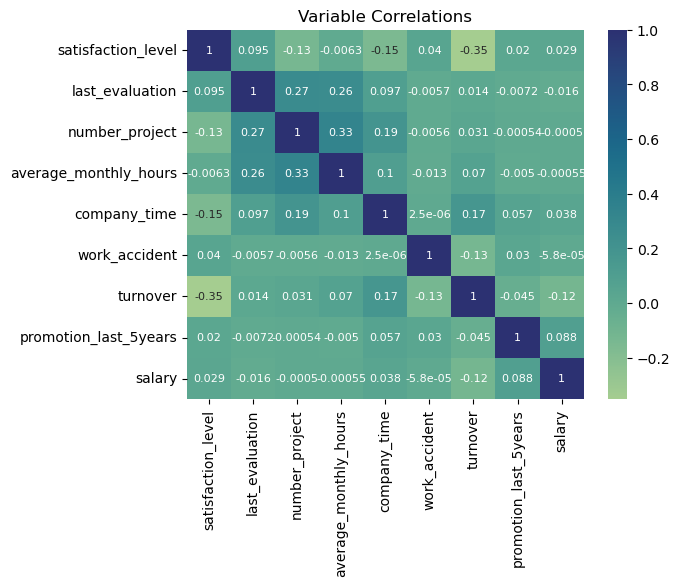

In [16]:
sns.heatmap(df1.corr(numeric_only=True),annot=True,annot_kws={"size":8},cmap='crest')
plt.title('Variable Correlations')

In [15]:
df1.corr(numeric_only=True)['satisfaction_level'].sort_values()

turnover                -0.350558
company_time            -0.152915
number_project          -0.133246
average_monthly_hours   -0.006252
promotion_last_5years    0.019789
salary                   0.029241
work_accident            0.039940
last_evaluation          0.095186
satisfaction_level       1.000000
Name: satisfaction_level, dtype: float64

**Observations:**

Highest positive correlations:
1. Number of Projects x Avg Monthly Hours: 0.33
2. Number of Projects x Last Evaluation Score: 0.27
3. Last Evaluation Score x Avg Monthly Hours: 0.26

Highest negative correlations:
1. Turnover x Satisfaction Level: -0.35
2. Company Time x Satisfaction Level: -0.15
3. Number of Projects x Satisfaction Level: -0.13

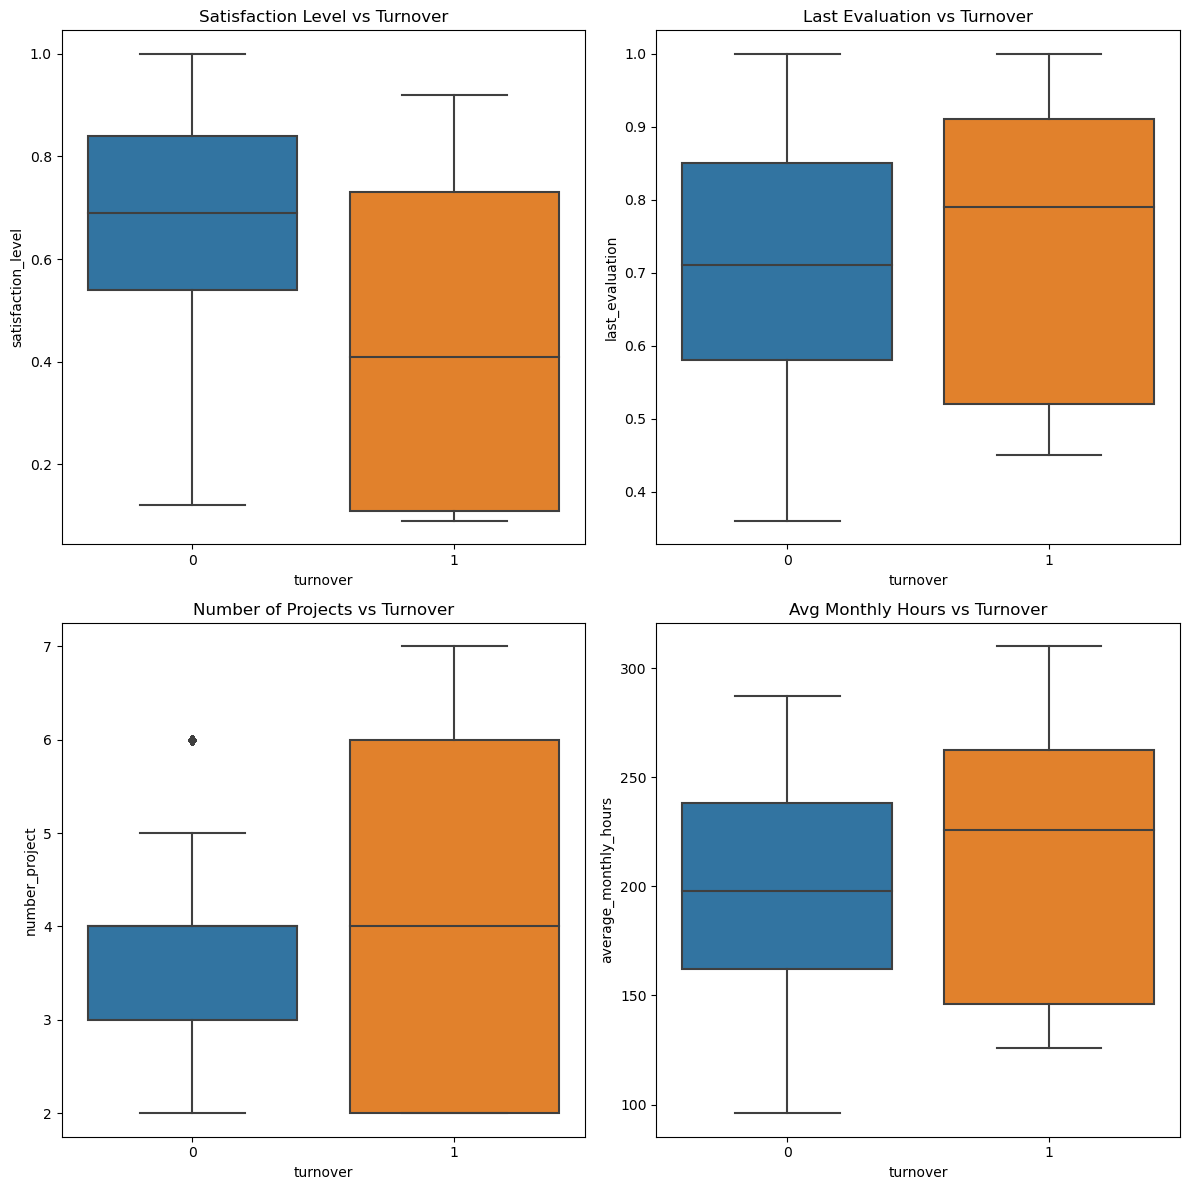

In [23]:
c = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours']
fig, axes = plt.subplots(2,2,figsize=(12,12))
sns.boxplot(df1,x='turnover',y=c[0],ax=axes[0,0])
axes[0,0].set_title('Satisfaction Level vs Turnover')
sns.boxplot(df1,x='turnover',y=c[1],ax=axes[0,1])
axes[0,1].set_title('Last Evaluation vs Turnover')
sns.boxplot(df1,x='turnover',y=c[2],ax=axes[1,0])
axes[1,0].set_title('Number of Projects vs Turnover')
sns.boxplot(df1,x='turnover',y=c[3],ax=axes[1,1])
axes[1,1].set_title('Avg Monthly Hours vs Turnover')
plt.tight_layout()

Text(0.5, 1.0, 'Company Time vs Turnover')

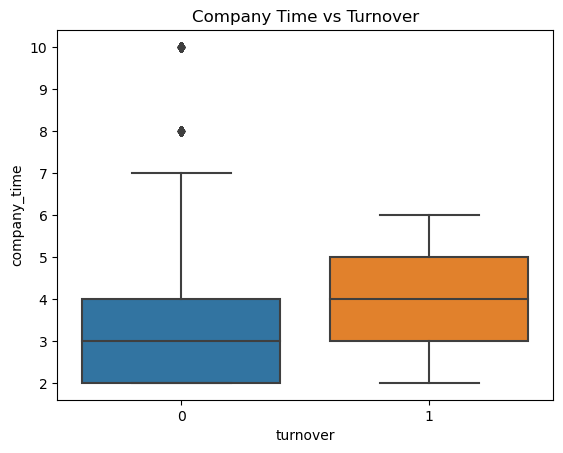

In [24]:
sns.boxplot(df1,x='turnover',y='company_time')
plt.title('Company Time vs Turnover')

**Observations:**

* As expected, the satisfaction levels of employees that left were far lower than their counterparts.
<br>

* Surprisingly, employees that left had a higher mean evaluation score. We can speculate they might have felt underapreciated or recieved external offers, a boxplot of last_evaluation and promotion might help us in this instance.
<br>

* Number or projects has a higher standard deviation in emplyees that left the company, let's investigate more.
<br>

* Employees that left seem to have worked more hours on average than those who stayed.
<br>

* When it comes company time, the 4 year period seems to be critical, and employees that go past 6 years tend to stay.

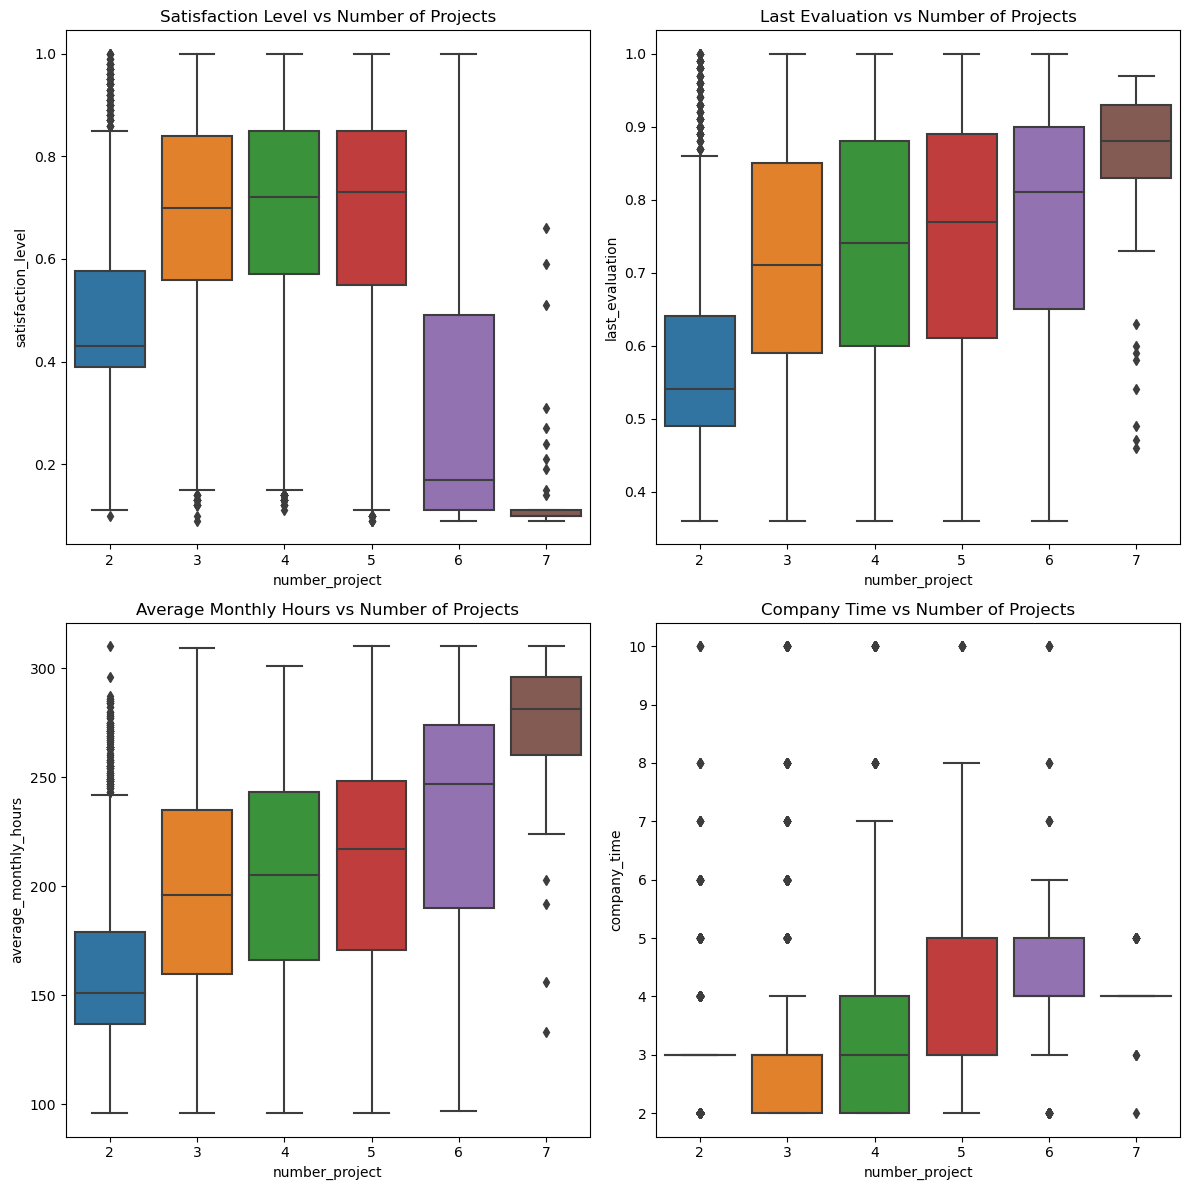

In [25]:
c = ['satisfaction_level','last_evaluation','average_monthly_hours','company_time']
fig, axes = plt.subplots(2,2,figsize=(12,12))
sns.boxplot(df1,x='number_project',y=c[0],ax=axes[0,0])
axes[0,0].set_title('Satisfaction Level vs Number of Projects')
sns.boxplot(df1,x='number_project',y=c[1],ax=axes[0,1])
axes[0,1].set_title('Last Evaluation vs Number of Projects')
sns.boxplot(df1,x='number_project',y=c[2],ax=axes[1,0])
axes[1,0].set_title('Average Monthly Hours vs Number of Projects')
sns.boxplot(df1,x='number_project',y=c[3],ax=axes[1,1])
axes[1,1].set_title('Company Time vs Number of Projects')
plt.tight_layout()

**Observations:**
    
* Evaluation and Average Monthly Hours seem to be directly correlated to number of projects taken by employees, even if slightly.
<br>

* Company time and number of prjects seem to be directly correlated until we get to the 5 projects, when an inverse correlation starts.
<br>

* The relationship between satisfaction level and number of projects seems very unique. Mean satisfaction of employees with only 2 projects is low, then it increases at 3 and maintains a similiar level up until 5 projects. After that there is a very sharp descrease to extremely low satisfaction levels. Employees with over 5 projects might feel overworked compared to others, it's something worth exploring.

Text(0.5, 1.0, 'Last Evaluation vs Promotion')

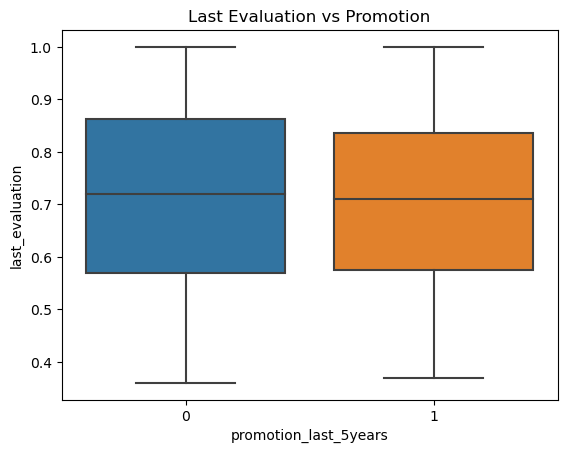

In [26]:
sns.boxplot(df1,x='promotion_last_5years',y='last_evaluation')
plt.title('Last Evaluation vs Promotion')

Text(0.5, 1.0, 'Last Evaluation vs Turnover')

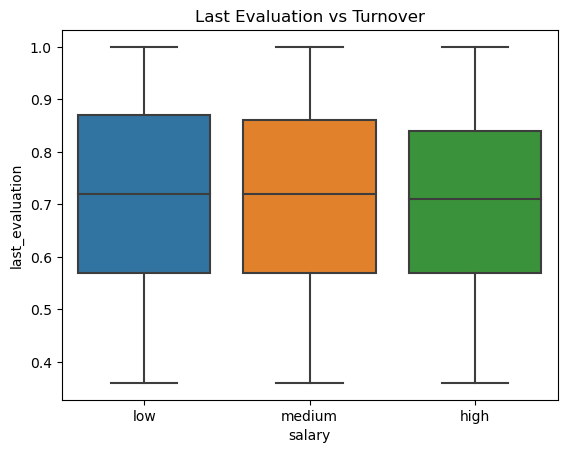

In [27]:
sns.boxplot(df1,x='salary',y='last_evaluation')
plt.title('Last Evaluation vs Turnover')

<Axes: title={'center': 'Turnover Rate vs Recent Promotion'}, ylabel='promotion_last_5years'>

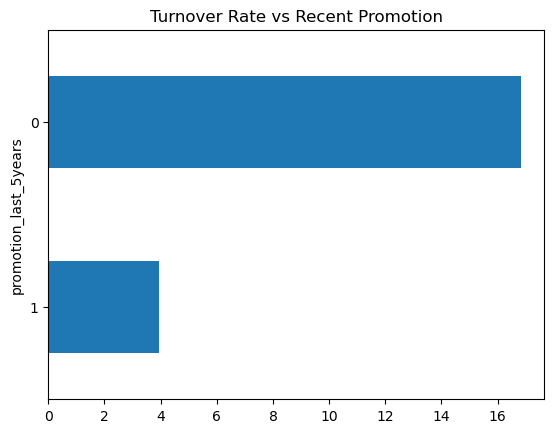

In [31]:
promo_percent = 100*df1.groupby('promotion_last_5years')['turnover'].sum()/df1.groupby('promotion_last_5years')['turnover'].count()
promo_percent.sort_values(ascending=True).plot(kind='barh',title='Turnover Rate vs Recent Promotion')

**Observations:**

Last evaluation distribution seems to be about the same across promotion status and salary range, further supporting the assumption of underappreciation, though that's not something that can be fully explored in this analysis. 


Still, promoted employees have a very low turnover rate compared to those that didn't get a promotion, so promotions seem to be a good way to decrease turnover.

<Axes: title={'center': 'Absolute Turnover Volume per Department'}, ylabel='department'>

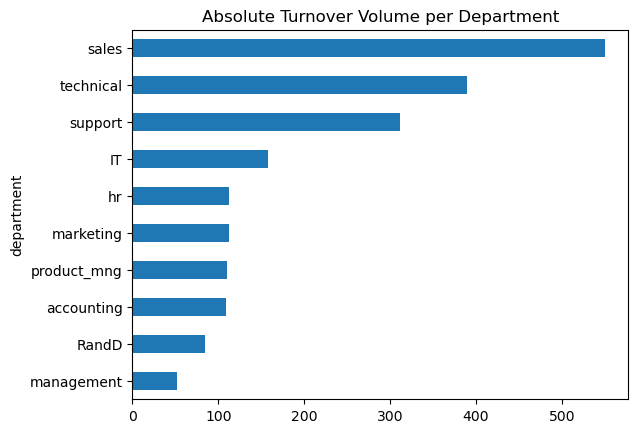

In [29]:
dept_series = df1.groupby('department')['turnover'].sum().sort_values(ascending=False)
dept_series.sort_values(ascending=True).plot(kind='barh',title='Absolute Turnover Volume per Department')

<Axes: title={'center': 'Relative Turnover per Department'}, ylabel='department'>

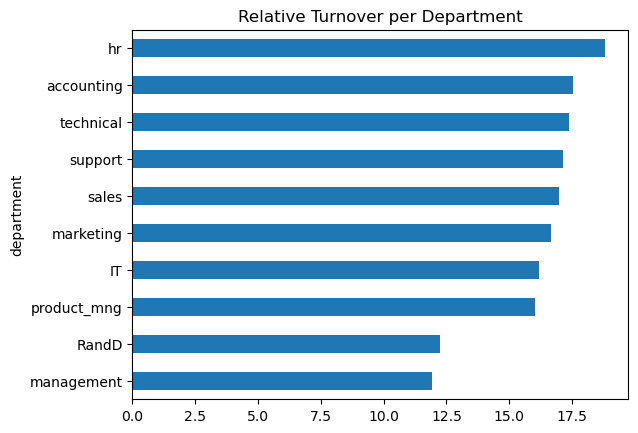

In [30]:
dept_percent = 100*df1.groupby('department')['turnover'].sum()/df1.groupby('department')['turnover'].count()
dept_percent.sort_values(ascending=True).plot(kind='barh',title='Relative Turnover per Department')

In [31]:
df1[df1['department']=='management']['salary'].value_counts()

medium    169
low       139
high      128
Name: salary, dtype: int64

**Observations:**

Relative turnover seems to be pretty close across most departments, between 16% and 19%, with a sharp drop when we get to RandD and management roles, with less than 12.5% turnover. 
There is no indication as to what RandD stands for and, since we are unable to cantact the original owner of the set, we can't really explore this entry.
As for management, they have the lowest turnover rate even though their salaries aren't necessarily high.

When it comes to absolute turnover values, sales, technichal and support are far above the rest, given their higher department sizes. 

Text(0.5, 1.0, 'Salary Range')

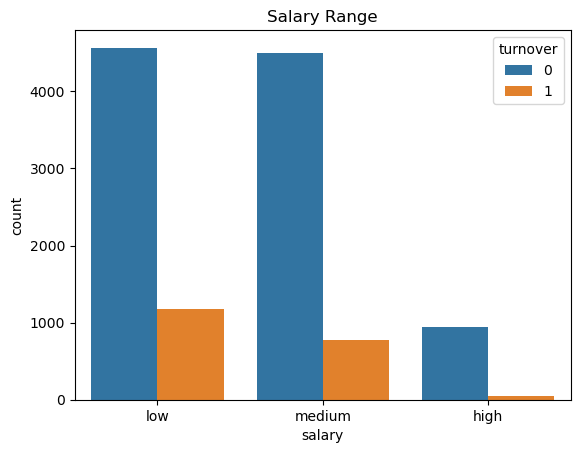

In [32]:
sns.countplot(data=df1,x='salary',hue='turnover')
plt.title('Salary Range')

<Axes: title={'center': 'Turnover Rate per Salary Range'}, ylabel='salary'>

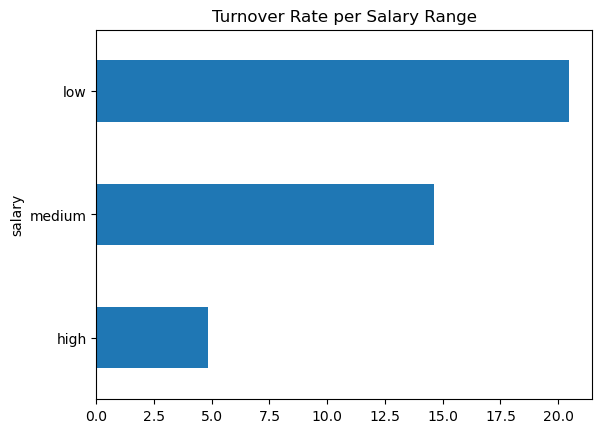

In [35]:
salary_percent = 100*df1.groupby('salary')['turnover'].sum()/df1.groupby('salary')['turnover'].count()
salary_percent.sort_values(ascending=True).plot(kind='barh',title='Turnover Rate per Salary Range')

**Observations:**

As expected, higher salaries decrease turnover rate, with the rate for high range being close to 1/3 of that of the medium range.

Text(0.5, 1.0, 'Work Accidents')

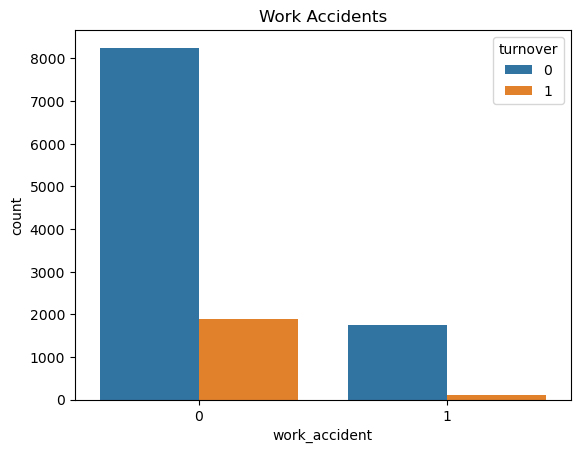

In [34]:
sns.countplot(data=df1,x='work_accident',hue='turnover')
plt.title('Work Accidents')

<Axes: title={'center': 'Work Accidents per Department'}, ylabel='department'>

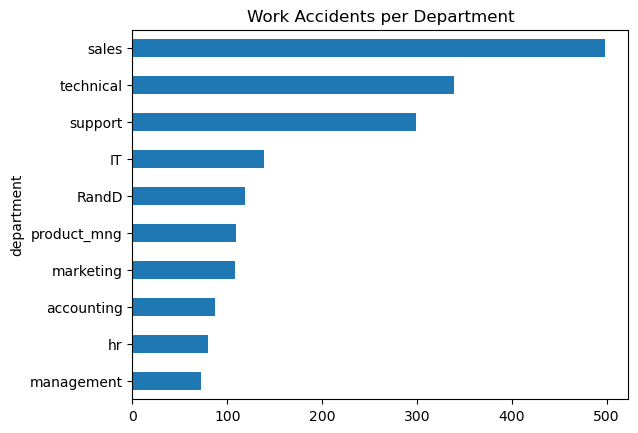

In [35]:
wa_series = df1.groupby('department')['work_accident'].sum().sort_values(ascending=False)
wa_series.sort_values(ascending=True).plot(kind='barh',title='Work Accidents per Department')

<Axes: title={'center': 'Turnover Rate vs Work Accident'}, ylabel='work_accident'>

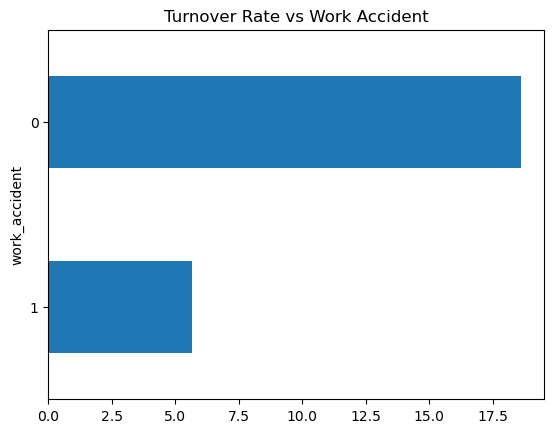

In [30]:
wa_percent = 100*df1.groupby('work_accident')['turnover'].sum()/df1.groupby('work_accident')['turnover'].count()
wa_percent.sort_values(ascending=True).plot(kind='barh',title='Turnover Rate vs Work Accident')

**Observations:**

Turnover is lower in employees that suffered a work accident, which might be our first ethical consideration in regards to this analysis, since it contradicts the principle of safety.
Therefore, the work accident variable will be removed from our data before building our model.

Text(0.5, 1.0, 'Turnover (Target) Distribution')

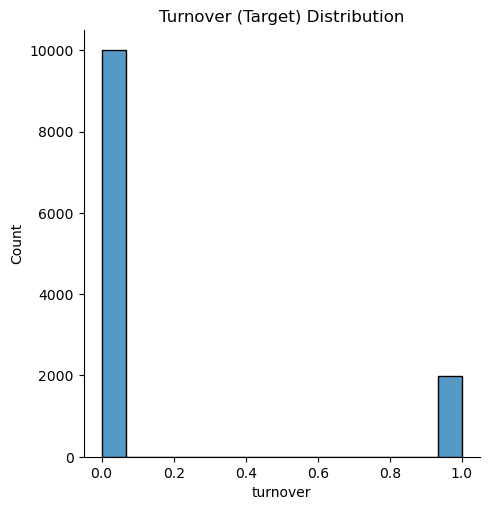

In [37]:
sns.displot(df1['turnover'])
plt.title('Turnover (Target) Distribution')

**Observations:**

As observed earlier, the target variable, turnover, is moderately unbalanced. When setting our paramters for GridSearchCV we will test both None and Balanced values for class_weight.

### Insights

In [38]:
df1.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_monthly_hours,157,262,272,223,159
company_time,3,6,4,5,3
work_accident,0,0,0,0,0
turnover,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
department,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


**Let's summarize our previour observations for each independent variable:**


* Satisfaction level: as expected, seem to be inversely correlated to turnover.
</br>

* Last evaluation: surprisingly, seems to be directly correlated to turnover. Although this might seem an ethical consideration at first, it might just mean higher evaluated employees feel unapreciated or are receiving better employment offers. Therefore a higer importance/coefficient in this variable might indicate the need of better carrer plans and recognition/compensation based on performance.
<br>
* Number of projects: when comparing to turnover we can only observe a higher standard deviation, but after exploring it's relationship with other variables, we can see a sharp decrease in satisfaction level, to extremely low levels, starting at 6 projects. Employees at that project range probably feel overworked, it's a point worth investigating.
<br>
* Average Monthly Hours: employees that left seem to work more monthly hours on average.
<br>
* Company Time: as pointed earlier, the 4 to 6 years period seems to be critical, and employees that go past 6 years tend to stay. Even though there are some ouliers in this variable, they were considered worth keeping.
<br>
* Work Accident: this point raised an ethical concern and was removed from the analysis.
<br>
* Promotion Last 5 Years: as expected, promotions seem to be inversely correlated to employee turnover, so better carrer plans and recognition might be good alternatives to promote employee retention.
<br>
* Department: there is slight variation of turnover rate over department, but the most noticiable is in the management and RandD departments, that have lower rates.
<br>
* Salary: as expected, salary is inversely correlated to employee turnover, with higher salaries having very low turnover rates.

# PACE: Construct
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classfication problem.

### Identify the types of models most appropriate for this task.

Some models that might be used in binary classification problems are:
* Logistic Regression
* Naive Bayes
* K-Nearest Neighbours
* Support Vector Machines 
* Decision Trees
* Random Forest
* XGboost
* Neural Networks

### Modeling

Add as many cells as you need to conduct the modeling process.

Given we have a few outliers that we want to keep and we are opting to use a model that is roboust to them, Random Forest. 

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   company_time           11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   turnover               11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


**Observations:**

First we need to transform the object columns using data enconding. 

We'll use one hot encoding for the department and ordinal econding for the salary.

In [10]:
df1['salary'] = df1['salary'].map({'low':1, 'medium':2, 'high':3})
df1.head(10).T

C:\Users\canci\AppData\Local\Temp\ipykernel_16136\1181384798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary'] = df1['salary'].map({'low':1, 'medium':2, 'high':3})


,0,1,2,3,4,5,6,7,8,9
satisfaction_level,0.38,0.8,0.11,0.72,0.37,0.41,0.1,0.92,0.89,0.42
last_evaluation,0.53,0.86,0.88,0.87,0.52,0.5,0.77,0.85,1.0,0.53
number_project,2,5,7,5,2,2,6,5,5,2
average_monthly_hours,157,262,272,223,159,153,247,259,224,142
company_time,3,6,4,5,3,3,4,5,5,3
work_accident,0,0,0,0,0,0,0,0,0,0
turnover,1,1,1,1,1,1,1,1,1,1
promotion_last_5years,0,0,0,0,0,0,0,0,0,0
department,sales,sales,sales,sales,sales,sales,sales,sales,sales,sales
salary,1,2,2,1,1,1,1,1,1,1


In [17]:
df1 = pd.get_dummies(df1,columns=['department'],drop_first=True)
df1.head(10).T

,0,1,2,3,4,5,6,7,8,9
satisfaction_level,0.38,0.80,0.11,0.72,0.37,0.41,0.10,0.92,0.89,0.42
last_evaluation,0.53,0.86,0.88,0.87,0.52,0.50,0.77,0.85,1.00,0.53
number_project,2.00,5.00,7.00,5.00,2.00,2.00,6.00,5.00,5.00,2.00
average_monthly_hours,157.00,262.00,272.00,223.00,159.00,153.00,247.00,259.00,224.00,142.00
company_time,3.00,6.00,4.00,5.00,3.00,3.00,4.00,5.00,5.00,3.00
work_accident,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
turnover,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
salary,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
department_RandD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [18]:
X = df1.drop(['turnover','work_accident'],axis=1)
y = df1['turnover']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

In [45]:
rfc = RandomForestClassifier(random_state=0)

In [46]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

**Observations:**
    
First, we'll run our RandomForestClassifier model with default hyperparameters and check our metrics.

In [47]:
def metrics_df(model_name:str,y_test,y_pred):
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    roc_auc = metrics.roc_auc_score(y_test,y_pred)
    
    table = pd.DataFrame({'Model': [model_name],
                          'Precision':[precision],
                          'Recall':[recall],
                          'F1 Score':[f1_score],
                          'Accuracy':[accuracy],
                          'ROC AUC':[roc_auc]})
    
    return table

In [48]:
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.99      0.91      0.95       498

    accuracy                           0.98      2998
   macro avg       0.99      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



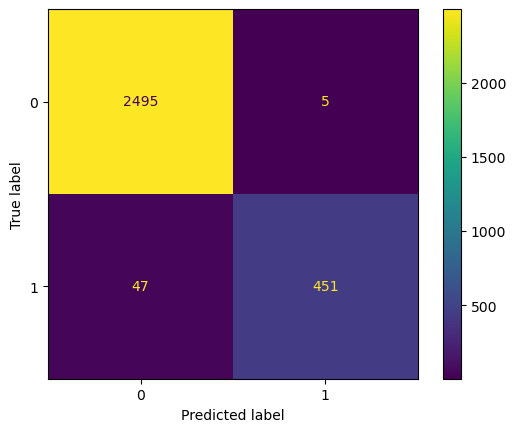

In [49]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
disp.plot()

**Observations:**

Our initial results seem quite promissing, let's take a look at our feature importance.

In [10]:
def plot_importance(model_name:str,model,X):
    features = X.columns
    importance = model.feature_importances_
    series = pd.Series(data=importance,index=features).sort_values(ascending=True)
    series.plot.barh()
    plt.title(f'Importance of features in the {model_name} model')
    return

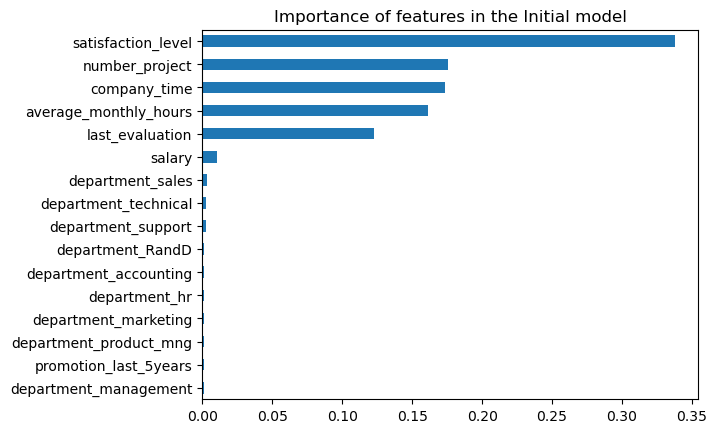

In [51]:
plot_importance('Initial',rfc,X)

**Observations:**

As expected, the satisfaction level is the most important feature associated with employee turnover, with other important features being number of projects, company time, average monthly hours and last evaluation restuls.

Salaries and promotions were not considered important features by the model, even though during EDA they seemed be. This is likely because of their imbalaced distribution, making them unreliable features when splitting data.

Still, these results raise an important point. It might by hard maintaining updated satisfaction level stats for all employees and, even if possible, it might be too late to take action based on this feature. Therefore, we might have a more consequential model if we remove this feature.

In [19]:
new_X = X.drop('satisfaction_level',axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, stratify=y, test_size=0.25, random_state=0)

In [71]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
results = metrics_df('Default',y_test,y_pred)
results

,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC
0,Default,0.927235,0.895582,0.911134,0.970981,0.940791


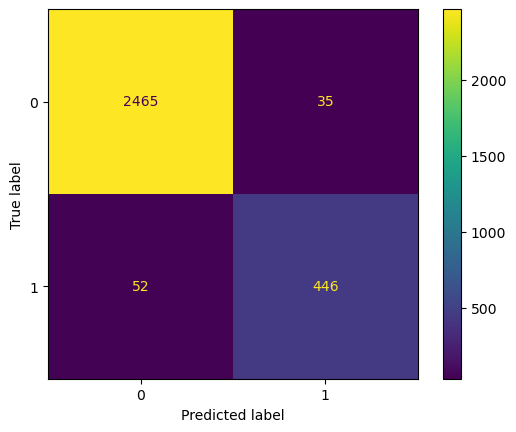

In [54]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
disp.plot()

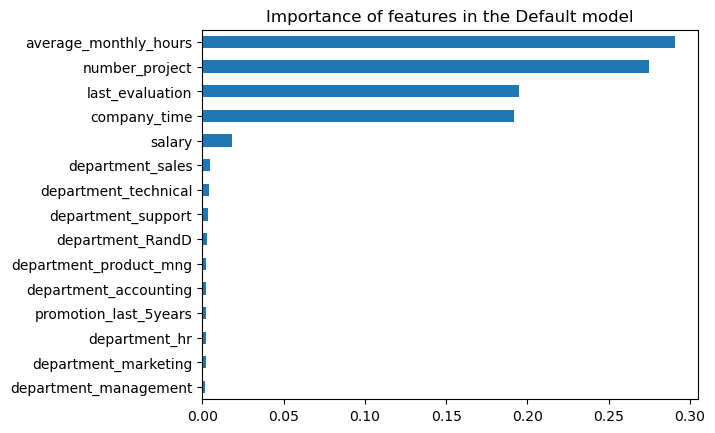

In [55]:
plot_importance('Default',rfc,new_X)

**Observations:**

Our new metrics have slightly lower scores, but are still mostly above 0.9 and our model is now more reliable when it comes to avaliable data. The biggest impact seems to be regarding the amount of false positives, but the value is still relatively low.

As far as feature importance goes, our 4 main features remain the same, but they change order of importance, now being:
1. Average Monthly Hours
2. Number of Projects
3. Last Evaluation
4. Company Time

Salary also got a small boost.

Now, we'll try to further refine our model by adjusting our hyperparameters.

In [56]:
rand_params = {'n_estimators': np.linspace(100,1500,15,dtype='int'),
             'max_depth':np.linspace(10,80,8,dtype='int'), 
             'min_samples_leaf':np.logspace(-4,-2,10), 
             'min_samples_split':np.logspace(-3,-2,6),
             'max_features':np.linspace(4,12,9,dtype='int'),
             'max_samples': np.linspace(0.5,0.9,5), 
             'class_weight':[None,'balanced'],
}
scoring = {'precision','recall','f1','accuracy','roc_auc'}
rfc_rand = RandomizedSearchCV(rfc,
                              rand_params,
                              n_iter=100,
                              scoring=scoring,
                              cv=3,
                              refit='f1', 
                              n_jobs=-1,
                              verbose=2,
                              random_state=0)

In [57]:
rfc_rand.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80]),
                                        'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'max_samples': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_leaf': array([0.0001    , 0.00016681, 0.00027826, 0.00046416, 0.00077426,
       0.00129155, 0.00215443, 0.00359381, 0.00599484, 0.01      ]),
                                        'min_samples_split': array([0.001     , 0.00158489, 0.00251189, 0.00398107, 0.00630957,
       0.01      ]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500])},
                   random_state=0, refit='f1',
                   scoring={'recall', 'f1', 'precision', 'roc_auc', 'accuracy'},
                   verbose=2)

**Observations:**
    
Since Random Forest Classifier has a lot of hyperparameters to be tuned, we'll use sklearn's RandomizedSearchCV to narrow down our range.

In [58]:
rfc_rand.best_params_

{'n_estimators': 900,
 'min_samples_split': 0.0025118864315095794,
 'min_samples_leaf': 0.0001,
 'max_samples': 0.9,
 'max_features': 10,
 'max_depth': 60,
 'class_weight': None}

In [72]:
y_pred = rfc_rand.predict(X_test)
rand_df = metrics_df('RandomSearch',y_test,y_pred)
results = pd.concat([results,rand_df],axis=0).reset_index(drop=True)
results

,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC
0,Default,0.927235,0.895582,0.911134,0.970981,0.940791
1,RandomSearch,0.942029,0.913655,0.927625,0.976318,0.951227


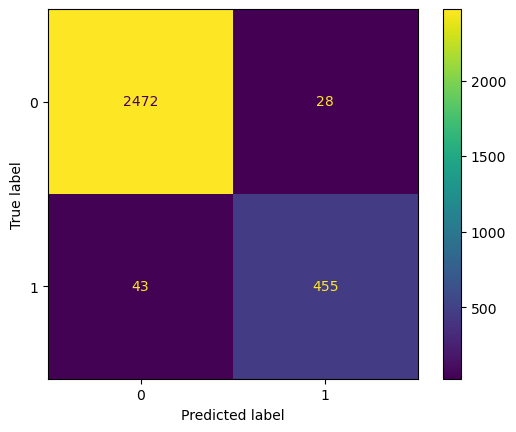

In [60]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=rfc_rand.classes_)
disp.plot()

**Observations:**

RandomSearchCV hyperparameter tuning has improved the scores of our model in all metrics.

Now, we'll use the resulting list of best parametes as referente and run GridSearchCV, aiming for an even better model.

In [67]:
grid_params = {'n_estimators': [800,900,1000],
             'max_depth':[30,40,50,60,70], 
             'min_samples_leaf':[0.0001], 
             'min_samples_split':[0.002,0.0025,0.003],
             'max_features':[8,9,10,11,12],
             'max_samples': [0.8,0.9],
             'class_weight':[None],
}
rfc_grid = GridSearchCV(rfc,grid_params,scoring=scoring,cv=5,refit='f1', n_jobs=-1,verbose=2)

**Observations:**
    
According to sklearn documentation, GridSearchCV already uses a StratifiedKFold when the estimator is a classifier and target is binary. Therefore, we won't be setting a StratifiedKFold object.

In [68]:
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': [None],
                         'max_depth': [30, 40, 50, 60, 70],
                         'max_features': [8, 9, 10, 11, 12],
                         'max_samples': [0.8, 0.9],
                         'min_samples_leaf': [0.0001],
                         'min_samples_split': [0.002, 0.0025, 0.003],
                         'n_estimators': [800, 900, 1000]},
             refit='f1',
             scoring={'recall', 'f1', 'precision', 'roc_auc', 'accuracy'},
             verbose=2)

In [69]:
rfc_grid.best_params_

{'class_weight': None,
 'max_depth': 30,
 'max_features': 11,
 'max_samples': 0.9,
 'min_samples_leaf': 0.0001,
 'min_samples_split': 0.0025,
 'n_estimators': 900}

In [70]:
y_pred = rfc_grid.predict(X_test)
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.94      0.91      0.93       498

    accuracy                           0.98      2998
   macro avg       0.96      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



In [73]:
grid_df = metrics_df('GridSearch',y_test,y_pred)
results = pd.concat([results,grid_df],axis=0).reset_index(drop=True)
results

,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC
0,Default,0.927235,0.895582,0.911134,0.970981,0.940791
1,RandomSearch,0.942029,0.913655,0.927625,0.976318,0.951227
2,GridSearch,0.942029,0.913655,0.927625,0.976318,0.951227


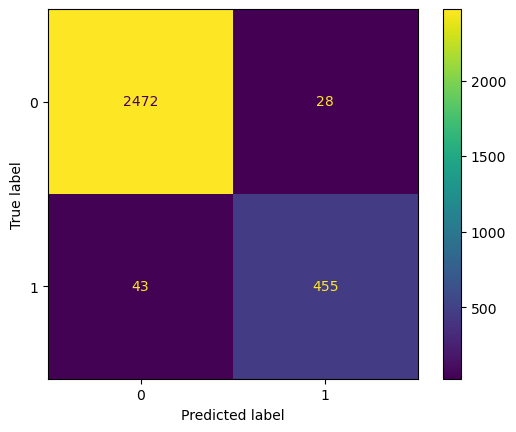

In [74]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=rfc_grid.classes_)
disp.plot()

**Observations:**

Our GridSearchCV returned the same scores as our RandomizedSearchCV for all metrics, so it seems we've reached the best hyperparameters for this model.

In [2]:
import pickle

In [82]:
pickle.dump(rfc_grid, open('rfc_tuned.pkl', 'wb'))

In [15]:
rfc_tuned = pickle.load(open('rfc_tuned.pkl', 'rb'))
rfc_tuned.best_params_

{'class_weight': None,
 'max_depth': 30,
 'max_features': 11,
 'max_samples': 0.9,
 'min_samples_leaf': 0.0001,
 'min_samples_split': 0.0025,
 'n_estimators': 900}

**Observations:**

We used pickle to save our final model for future use.

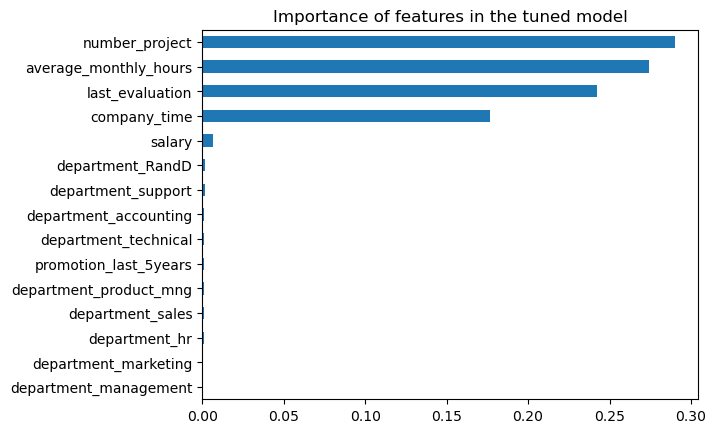

In [20]:
plot_importance('tuned',rfc_tuned.best_estimator_,new_X)

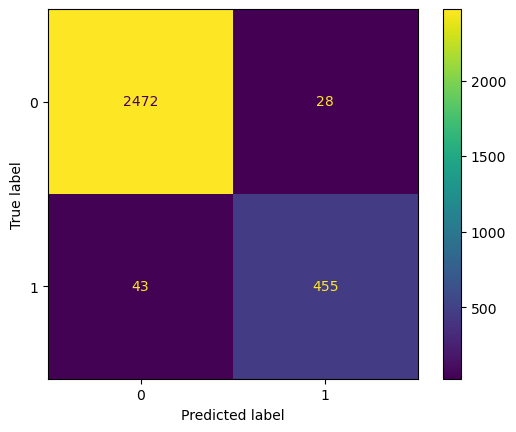

In [28]:
y_pred = rfc_tuned.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=rfc_tuned.classes_)
disp.plot()

**Observations:**

Our tuned model maintains the same top 4 features, with the final order of feature importance being:
1. Number of Projects
2. Average Monthly Hours
3. Last Evaluation
4. Company Time

# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The metrics of our tuned Random Forest model were:
* Precision: 0.942
* Recall: 0.914
* F1 Score: 0.928
* Accuracy: 0.976
* ROC AUC: 0.951

Our most important features were:
1. Number of Projects
2. Average Monthly Hours
3. Last Evaluation
4. Company Time

with the importance of other features being very low.

0    98.307064
1     1.692936
Name: promotion_last_5years, dtype: float64

### Conclusion, Recommendations, Next Steps

Our tuned model could be used as a predictive tool to identify employees that are likely to quit soon for tentative emergency action, but it should be done only be as a temporary measure, until steps are taken to correct the problems causing the high turnover rate.

Even though salary and promotion were not considered important features by our model, we should remember their imbalaced distributions make them unreliable features for splitting data in decision nodes. Our EDA showed they do affect the turnover rates and should be considered when planning our response to this issue.

By combining the insights of our model's feature importance values and EDA, a few elements became clear:
* Employees are being overworked, as shown by the high importance of number of projects and average monthly hours. Our EDA identified a sharp drop in satistaction level for employees working more than 5 projects.
* We've also seen that performance evaluation distribution is almost the same across salary ranges and promotion status, so higher performances don't seem to translate well to carrer improvement, making employees feel stagnated and undervalued and being more susceptible to other job offers.
* Finally, there seems to be a critical point at 4 years of employment that makes employees more prone to quitting. Considering the promotion rate for the last 5 years was only 1,7%, it could very well be that the lack of promotions over such a long period of time is making them seek employment elsewhere as an alternative for carrer improvement.

Now, here are a few recommendations based on those observations:
* Capping the number of projects each employee can work on, so it can't be higher than at least 5.
* Keeping a record of employees working overtime and setting limits of how many extra hours one should work until the cause is investigated and action is taken to support them.
* Reestructure company policy for promotions to prioritize better performance evaluation and company time, with special atention to employees nearing 4 years in company time.


**Next Steps:**

Our satisfaction level survey showed good correlation to turnover, meaning they were applied in a way employees felt confortable in answering truthfully, but making use of that only for ratings seems a wasted opportunity. When applying future surveys we could ask our employees directly for opinions, experiences and suggestions, then make use of natural language processing to identify padrons in their responses. This could give interesting insights we wouldn't be able to reach using only company data.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.